# PROYECTO FINAL

# Social Media Usage and Emotional Well-Being
# El uso de redes sociales y el estado de las emociones

Antes de sumergirnos en el análisis de modelos, realizamos un análisis exploratorio de datos para obtener una comprensión completa del conjunto de datos. Exploramos estadísticas clave, distribuciones y visualizaciones para identificar patrones y valores atípicos.

Fuente base de datos: https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being

**1. Informarse del Negocio**

Saber la repercusión de cada variable sobre el negocio y la variable objetivo: rangos de cada variable, valores medios, etc (en general)

In [1]:
#Carga de Datos y Importación de bibliotecas de Python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier              #modelo arbol decision
from sklearn.ensemble import RandomForestClassifier          #modelo random forest
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Suprimir todos los warnings (opcional, con precaución)
warnings.filterwarnings("ignore")

df = pd.read_csv('train.csv')

df.shape

(1001, 10)

Características:

- *User_ID*: Identificador único para el usuario.
- *Age*: Edad del usuario.
- *Gender*: Género del usuario (Femenino, Masculino, No binario).
- *Platform*: Plataforma de redes sociales utilizada (por ejemplo, Instagram, Twitter, Facebook, LinkedIn, Snapchat, Whatsapp, Telegram).
- *Daily_Usage_Time (minutes)*: Tiempo diario pasado en la plataforma en minutos.
- *Posts_Per_Day*: Número de publicaciones realizadas por día.
- *Likes_Received_Per_Day*: Número de "me gusta" recibidos por día.
- *Comments_Received_Per_Day*: Número de comentarios recibidos por día.
- *Messages_Sent_Per_Day*: Número de mensajes enviados por día.
- *Dominant_Emotion*: Estado emocional dominante del usuario durante el día (por ejemplo, Felicidad, Tristeza, Enojo, Ansiedad, Aburrimiento, Neutral).

**2. Analisis Exploratorio**

a. Variable objetivo: 'Dominant_Emotion'

    i. Tipo de dato: classificación (nm, n, i)
    Naturaleza de los datos: cualitativa politomica
    Nivel de medición: cualitativa nominal
    Posición investigación: variable dependiente de control
    
    ii. Estadística descriptiva    
    iii. Fun. distribuición
    
    
b. Variables independientes: 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day'

    i. Tipo de dato: classificación (nm, n, i)   
    
    Variable Cuantitativa Continua de Razón Independiente de Control: 
    'Daily_Usage_Time (minutes)' 
    
    Variables Cuantitativas Discretas de Razón Independientes de Control: 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Age' 
    
    Variables Cualitativas Politomica nominal Independientes de Control:
    'Gender', 'Platform'
    
    ii. Estadística descriptiva    
    iii. Fun. distribución    
    iv. Interpretar la variable en base a la Fun. Dist de la objetivo

2.1 Información General de los Datos: Miramos la información general de las variables

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [3]:
#miramos las clases de la variable objetivo y vemos que dentro de la variable objetivo tenemos 6 clases
print(f"Tenemos {df['Dominant_Emotion'].nunique()} clases en nuestra variable objetivo. Estas clases serían: {df['Dominant_Emotion'].unique()}")

Tenemos 6 clases en nuestra variable objetivo. Estas clases serían: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness' nan]


2.2 Estadísticas Descriptivas: Calculamos estadísticas descriptivas para las columnas numéricas.

In [4]:
# Calcular estadísticas descriptivas
stats = df.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
Daily_Usage_Time (minutes),1000.0,95.950,38.850442,40.0,65.00,85.0,120.0,200.0
Posts_Per_Day,1000.0,3.321,1.914582,1.0,2.00,3.0,4.0,8.0
Likes_Received_Per_Day,1000.0,39.898,26.393867,5.0,20.00,33.0,55.0,110.0
Comments_Received_Per_Day,1000.0,15.611,8.819493,2.0,8.00,14.0,22.0,40.0
Messages_Sent_Per_Day,1000.0,22.560,8.516274,8.0,17.75,22.0,28.0,50.0


2.3 Visualización de Distribuciones: Visualizamos los datos en histogramas

In [5]:
#miramos los registros existentes en la variable Edad
df['Age'].value_counts()

28                                                      92
27                                                      92
29                                                      90
22                                                      74
26                                                      66
25                                                      64
24                                                      64
31                                                      62
21                                                      56
33                                                      56
30                                                      48
23                                                      48
35                                                      38
32                                                      38
34                                                      36
Male                                                    28
Female                                                  

In [6]:
df[(df['Age'] =='Male') | (df['Age'] =='Female')| (df['Age'] =='Non-binary')]

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
250,251,Male,27,Instagram,165.0,6.0,85.0,30.0,28.0,Happiness
251,252,Female,24,Twitter,75.0,3.0,33.0,18.0,19.0,Anger
252,253,Non-binary,29,Facebook,85.0,2.0,27.0,9.0,20.0,Neutral
253,254,Female,33,Instagram,145.0,4.0,65.0,23.0,35.0,Sadness
254,255,Male,31,LinkedIn,60.0,1.0,15.0,7.0,17.0,Anxiety
...,...,...,...,...,...,...,...,...,...,...
784,784,Male,22,Twitter,70.0,1.0,22.0,7.0,22.0,Neutral
785,785,Non-binary,29,Facebook,75.0,2.0,20.0,8.0,20.0,Boredom
786,786,Female,28,Whatsapp,100.0,4.0,37.0,14.0,26.0,Anxiety
787,787,Male,31,Telegram,85.0,3.0,45.0,20.0,28.0,Sadness


In [7]:
# Lista de valores de género
gender_values = ['Male', 'Female', 'Non-binary']

# Identificar los registros donde 'Age' tiene valores de género
mask = df['Age'].isin(gender_values)

# Intercambiar los valores entre las columnas 'Age' y 'Gender'
df.loc[mask, ['Age', 'Gender']] = df.loc[mask, ['Gender', 'Age']].values

df = df[df['Age'] != ' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']

In [8]:
#cambiamos la variable Age a numerico
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Asegurarse de que la columna es de tipo float
df['Age'] = df['Age'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   object 
 1   Age                         1000 non-null   float64
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(6), object(4)
memory usage: 85.9+ KB


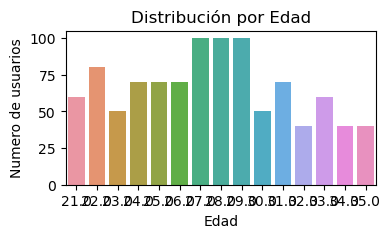

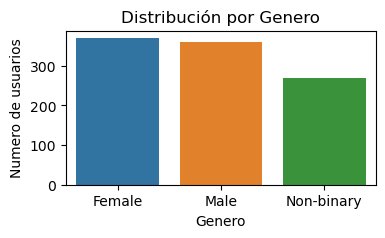

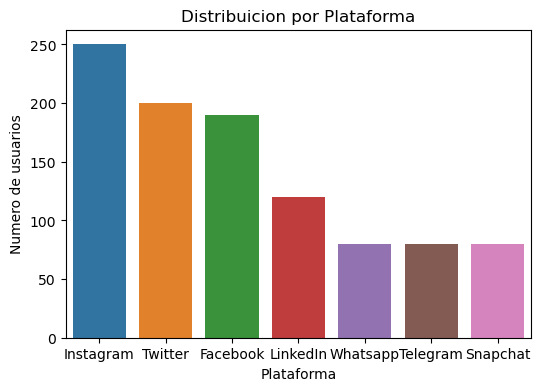

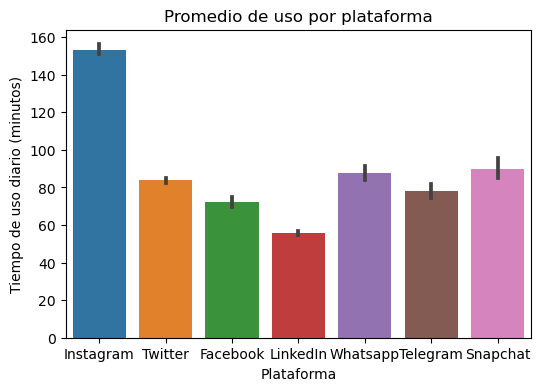

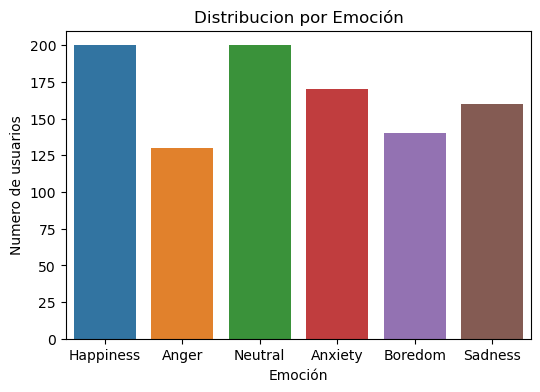

In [10]:
#plotamos histogramas con la distribución de las variables dependientes
plt.figure(figsize=(4, 2))
sns.countplot(x='Age', data=df)
plt.title('Distribución por Edad')
plt.xlabel('Edad')
plt.ylabel('Numero de usuarios')
plt.show()

plt.figure(figsize=(4, 2))
sns.countplot(x='Gender', data=df)
plt.title('Distribución por Genero')
plt.xlabel('Genero')
plt.ylabel('Numero de usuarios')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Platform', data=df)
plt.title('Distribuicion por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Numero de usuarios')
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=df, estimator=np.mean)
plt.title('Promedio de uso por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Tiempo de uso diario (minutos)')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Dominant_Emotion', data=df)
plt.title('Distribucion por Emoción')
plt.xlabel('Emoción')
plt.ylabel('Numero de usuarios')
plt.show()


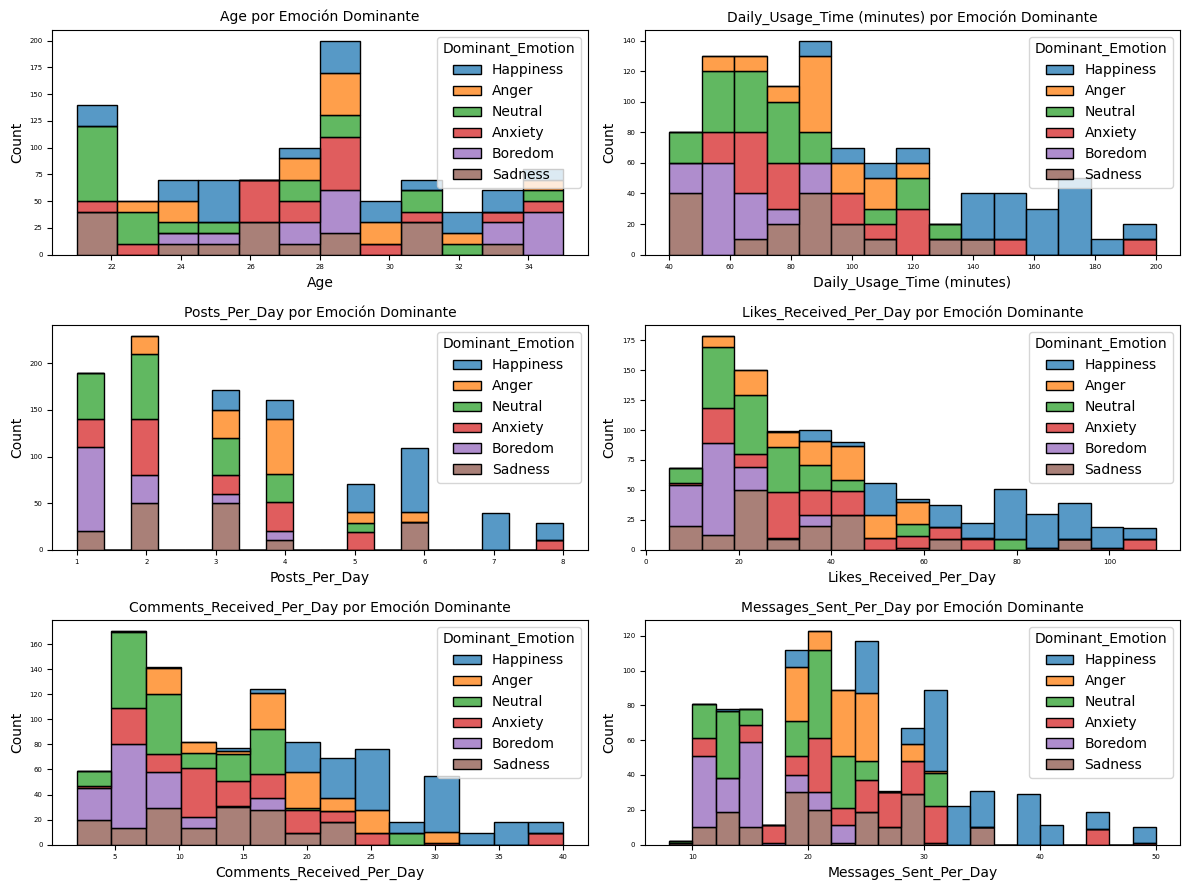

In [11]:
# Selecciona las variables continuas que queremos analizar
continuous_features = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 
                       'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Número de columnas para los subgráficos
num_cols = 2

# Calcular el número de filas necesarias
num_rows = (len(continuous_features) + num_cols - 1) // num_cols

# Crear la figura y los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))
axes = axes.flatten()  # Aplana el arreglo de ejes para iterar fácilmente

# Iterar sobre cada característica continua y crear el histograma
for i, feature in enumerate(continuous_features):
    sns.histplot(data=df, x=feature, hue='Dominant_Emotion', multiple='stack', palette='tab10', ax=axes[i])
    axes[i].set_title(f'{feature} por Emoción Dominante', fontsize=10)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)
        
# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()

**3. Analisis de la calidad de los datos**


Explora técnicas para detectar y rectificar valores faltantes, inconsistencias y errores usando Python, salvaguardando así la precisión del conjunto de datos para el análisis de cohortes subsiguiente.

a. Presencia de outliers => corregir o imputar a perdido

    i. Corregir por: media, moda, mediana, regresión
    ii. Imputar a NaN
    iii.Eliminar el registro
    
b. Presencia de misings (perdidos):

    i.Corregir por: media, moda, mediana, regresión
    ii. Eliminar el registro

3.1 Verificamos la presencia de outliers

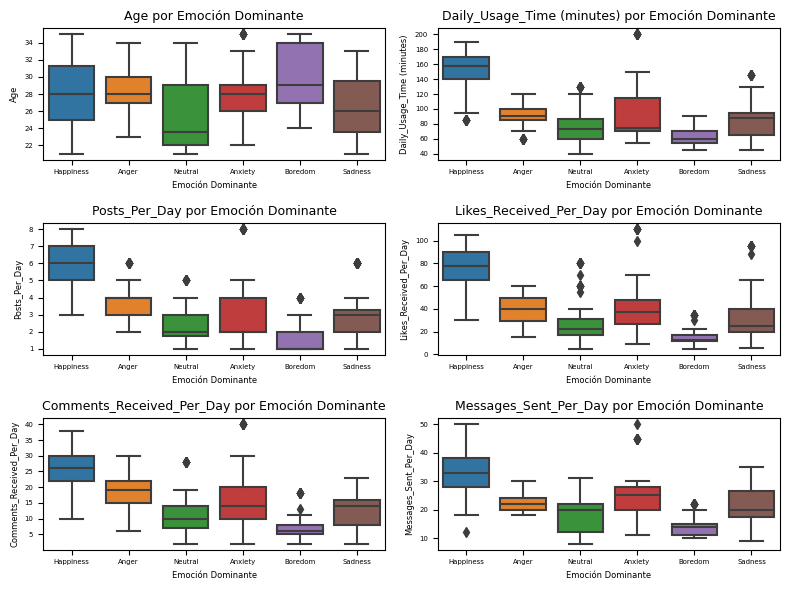

In [12]:
# Selecciona las variables continuas que quieres analizar
continuous_features = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 
                       'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Número de columnas para los subgráficos
num_cols = 2

# Calcular el número de filas necesarias
num_rows = (len(continuous_features) + num_cols - 1) // num_cols

# Crear la figura y los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2*num_rows))
axes = axes.flatten()  # Aplana el arreglo de ejes para iterar fácilmente

# Iterar sobre cada característica continua y crear el boxplot
for i, feature in enumerate(continuous_features):
    sns.boxplot(data=df, x='Dominant_Emotion', y=feature, palette='tab10', ax=axes[i])
    axes[i].set_title(f'{feature} por Emoción Dominante', fontsize=9)
    axes[i].set_xlabel('Emoción Dominante', fontsize=6)
    axes[i].set_ylabel(feature, fontsize=6)
    axes[i].tick_params(axis='x', labelsize=5)
    axes[i].tick_params(axis='y', labelsize=5)

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()
plt.show()

3.2 Valores Nulos y Duplicados: Revisamos si hay valores nulos y duplicados en los datos.

In [13]:
#b. miramos si hay duplicados
df.duplicated().sum()

0

In [14]:
#miramos si hay nulos
df.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [15]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

**4. Selección de variables altamente correladas**

a. Creación de variables: coger variables correladas

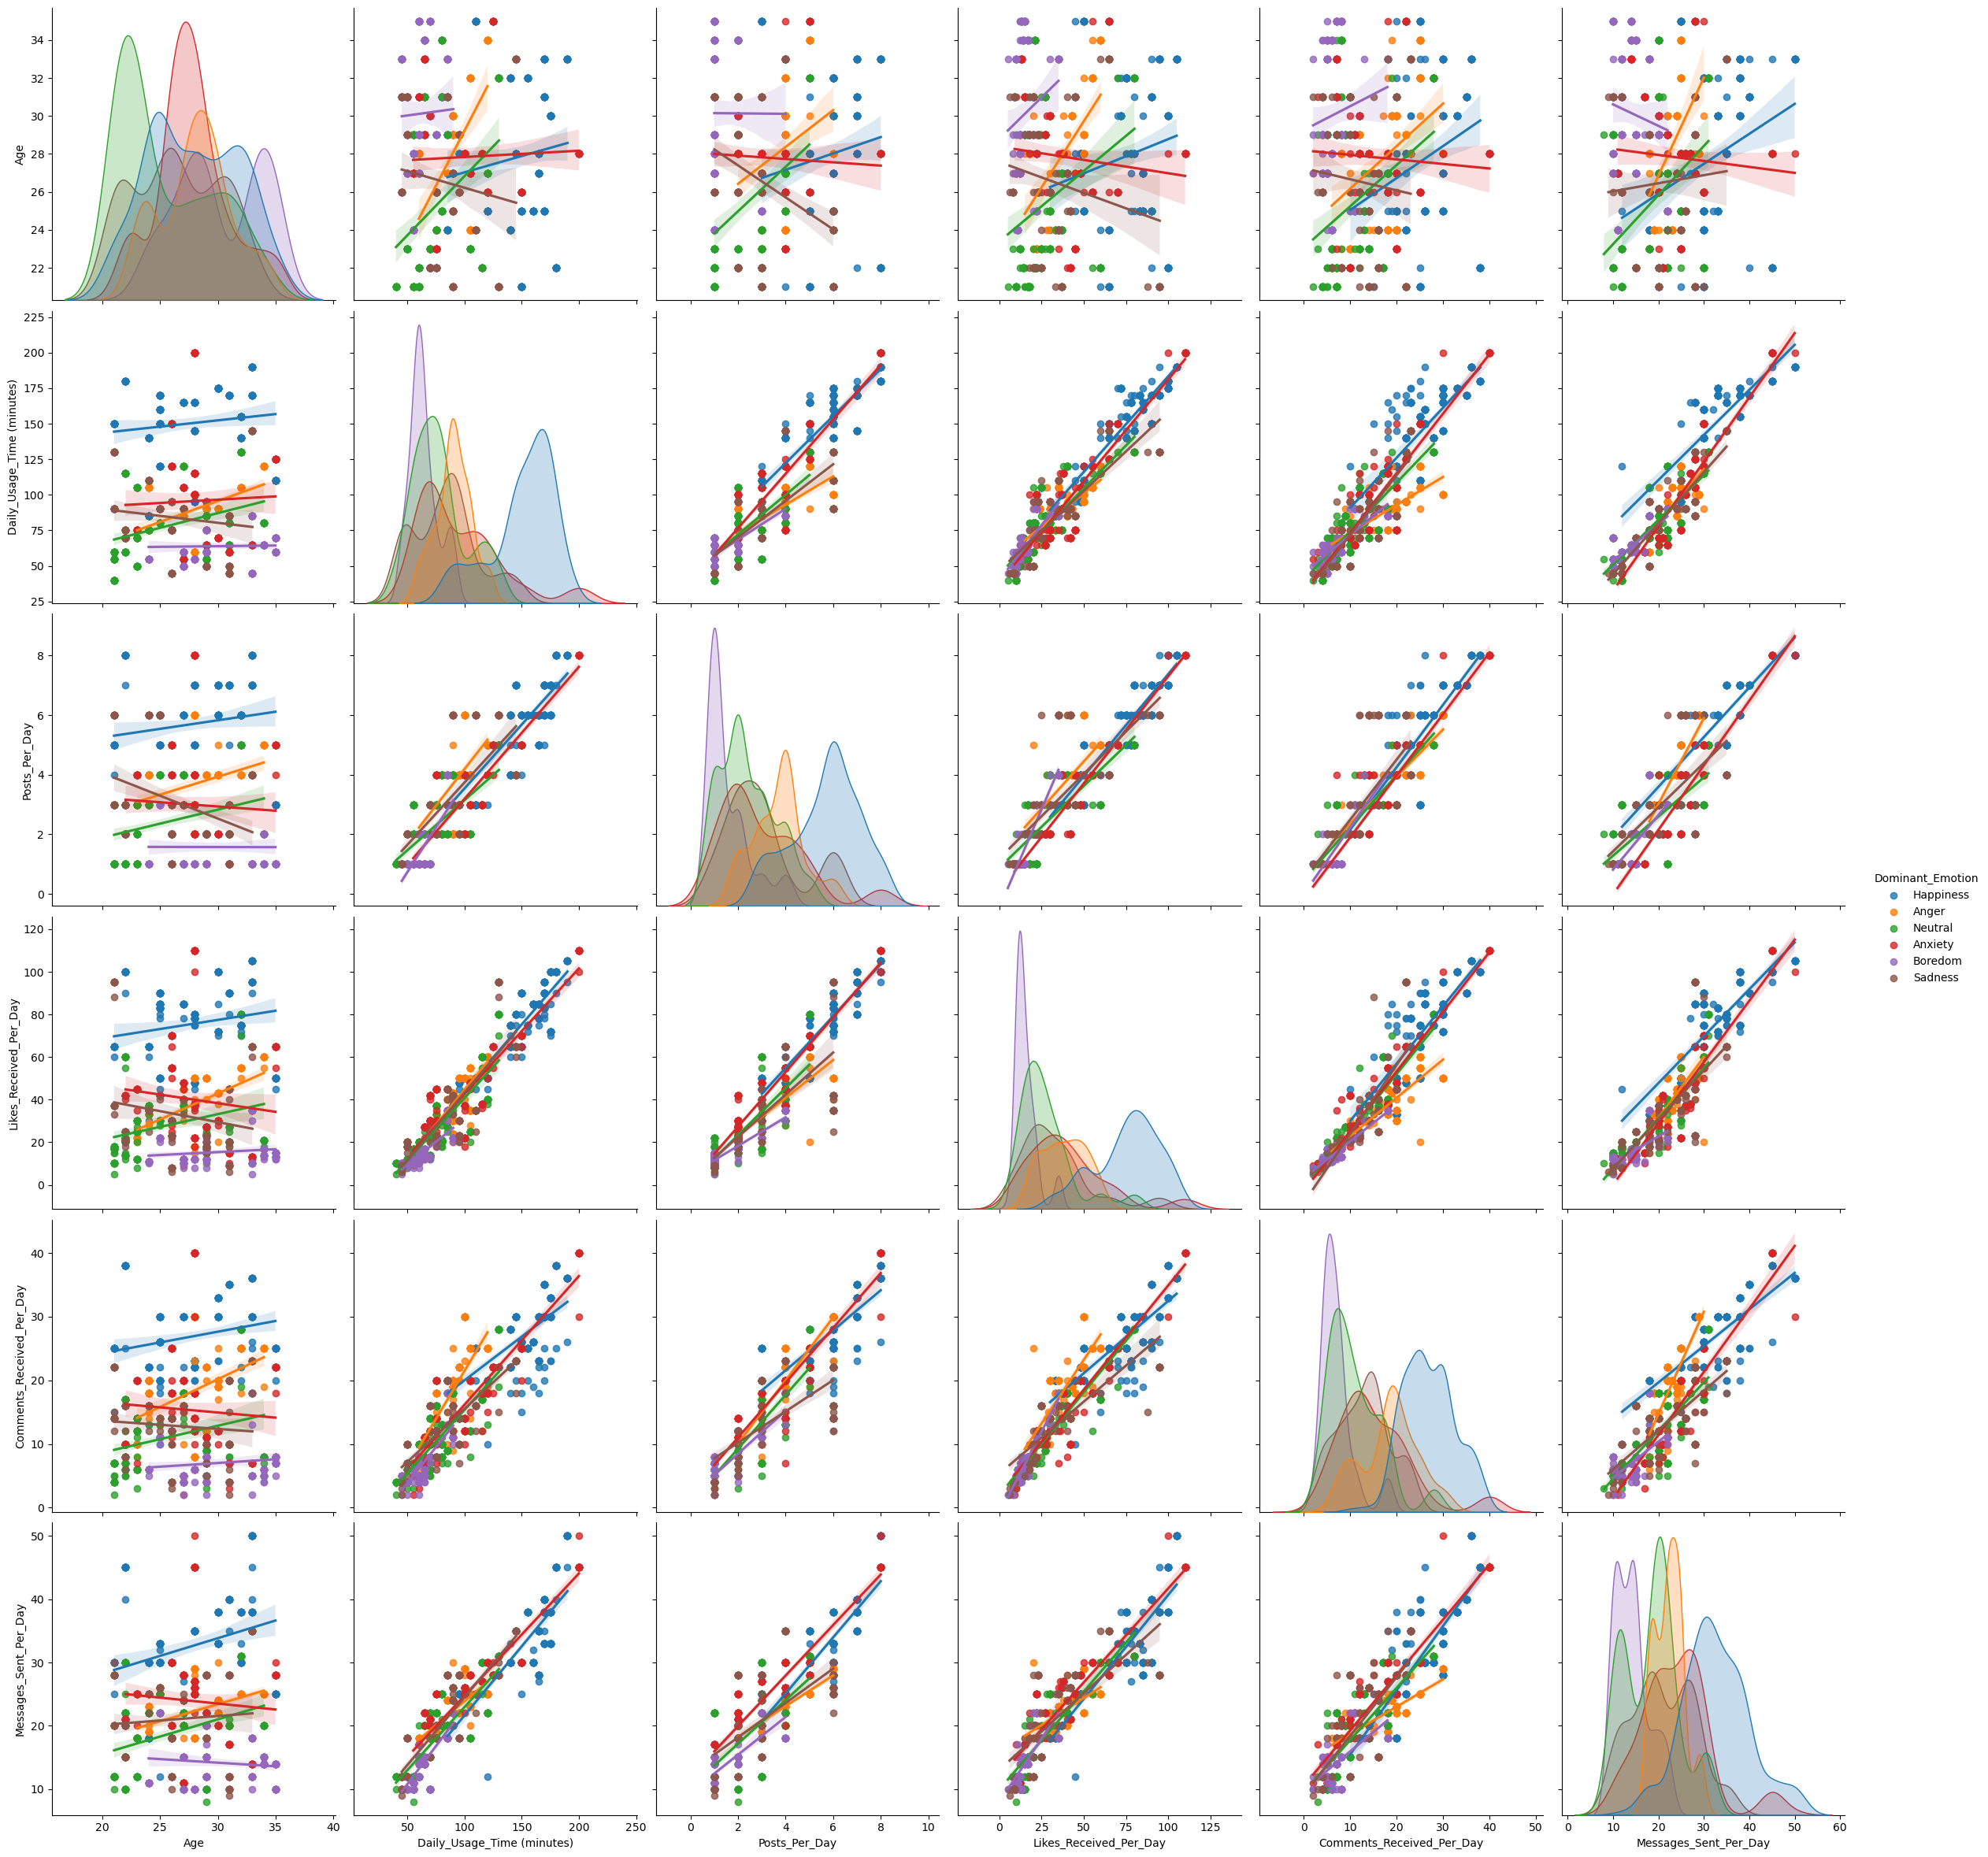

In [16]:
# Selecciona las variables continuas que quieres analizar
continuous_features = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 
                       'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Crear el pairplot
sns.pairplot(data=df.dropna(), 
             hue='Dominant_Emotion',
             height=4,
             vars=continuous_features,
             kind='reg',  # 'reg' agrega una línea de regresión en los scatter plots
             palette='tab10')

# Mostrar el gráfico
plt.show()

**5. Binarización de categorias**

In [17]:
#transformamos las variables categoricas en numericas
df = pd.get_dummies(df, columns=['Gender', 'Platform'], drop_first=True)

In [18]:
df.head()

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25.0,120.0,3.0,45.0,10.0,12.0,Happiness,0,0,1,0,0,0,0,0
1,2,30.0,90.0,5.0,20.0,25.0,30.0,Anger,1,0,0,0,0,0,1,0
2,3,22.0,60.0,2.0,15.0,5.0,20.0,Neutral,0,1,0,0,0,0,0,0
3,4,28.0,200.0,8.0,100.0,30.0,50.0,Anxiety,0,0,1,0,0,0,0,0
4,5,33.0,45.0,1.0,5.0,2.0,10.0,Boredom,1,0,0,1,0,0,0,0


**6. Transformación (escalado)**

In [19]:
y_train = df['Dominant_Emotion']
x_train = df.drop(df[['Dominant_Emotion','User_ID']],axis =1)

#Scaling data
scale =StandardScaler()
column = x_train.columns

x_train = scale.fit_transform(x_train)
scaled_x = pd.DataFrame(x_train , columns=column)
print(scaled_x.columns)

Index(['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary',
       'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat',
       'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp'],
      dtype='object')


**7. Division train y test**

In [20]:
train_x ,test_x , train_y , test_y = train_test_split(scaled_x,y_train,test_size=0.2,random_state=1)
print(train_x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 382 to 37
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         800 non-null    float64
 1   Daily_Usage_Time (minutes)  800 non-null    float64
 2   Posts_Per_Day               800 non-null    float64
 3   Likes_Received_Per_Day      800 non-null    float64
 4   Comments_Received_Per_Day   800 non-null    float64
 5   Messages_Sent_Per_Day       800 non-null    float64
 6   Gender_Male                 800 non-null    float64
 7   Gender_Non-binary           800 non-null    float64
 8   Platform_Instagram          800 non-null    float64
 9   Platform_LinkedIn           800 non-null    float64
 10  Platform_Snapchat           800 non-null    float64
 11  Platform_Telegram           800 non-null    float64
 12  Platform_Twitter            800 non-null    float64
 13  Platform_Whatsapp           800 no

**8. Modelo**

8.1 Regresión Logistica

In [21]:
# Crear el modelo de regresión logística
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, train_x, train_y, cv=cv, scoring='accuracy')

# Entrenar el modelo
model.fit(train_x, train_y)

# Evaluar el modelo
y_pred = model.predict(test_x)

# Calcular la exactitud
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(test_y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_y, y_pred)
print('Classification Report:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.56
Confusion Matrix:
[[20  0  0  0  2  3]
 [ 3 17  3  9  0  3]
 [ 3  3 16  0 10  1]
 [ 5  0  0 27  0  1]
 [ 3  2  6  2 22  9]
 [ 1  4  0  4 10 11]]
Classification Report:
              precision    recall  f1-score   support

       Anger       0.57      0.80      0.67        25
     Anxiety       0.65      0.49      0.56        35
     Boredom       0.64      0.48      0.55        33
   Happiness       0.64      0.82      0.72        33
     Neutral       0.50      0.50      0.50        44
     Sadness       0.39      0.37      0.38        30

    accuracy                           0.56       200
   macro avg       0.57      0.58      0.56       200
weighted avg       0.57      0.56      0.56       200

Cross-validation accuracy scores: [0.63125 0.54375 0.55    0.575   0.6125 ]
Mean cross-validation accuracy: 0.58


8.2 Modelo Arbol de decisión

In [22]:
# Definimos los hiperparametros
param_grid = {                                 #definir los hiperparametros
    'n_estimators': [50, 100, 200],            #número de estimadores (arboles)
    'max_depth': [None, 10, 20, 30],           #máxima profundidad (cuantas variables voy llegar a abordar)
    'min_samples_split': [2, 5, 10],           #numero minimo de muestras voy utilizar para cada uno de los arboles
    'min_samples_leaf': [1, 2, 4],             #numero mínimo de caracteristicas
    'max_features': ['auto', 'sqrt', 'log2']   
}

In [23]:
# using Decision Tree Classifier 
tree = DecisionTreeClassifier(random_state=42)
tree.fit(train_x,train_y)

score = tree.score(test_x,test_y)*100
print(f"La accuracy del modelo arbol de decisión es de: {score}")

from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Exactitud:', accuracy_score(test_y, y_pred))
print('F1 score:', f1_score(test_y, y_pred, average="macro"))
print('Precision:', precision_score(test_y, y_pred, average="macro"))
print('Recall:', recall_score(test_y, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(test_y, y_pred))

La accuracy del modelo arbol de decisión es de: 96.5
Exactitud: 0.565
F1 score: 0.5625130331009359
Precision: 0.5668315018315019
Recall: 0.5759018759018759

 clasification report:
               precision    recall  f1-score   support

       Anger       0.57      0.80      0.67        25
     Anxiety       0.65      0.49      0.56        35
     Boredom       0.64      0.48      0.55        33
   Happiness       0.64      0.82      0.72        33
     Neutral       0.50      0.50      0.50        44
     Sadness       0.39      0.37      0.38        30

    accuracy                           0.56       200
   macro avg       0.57      0.58      0.56       200
weighted avg       0.57      0.56      0.56       200



8.3 Modelo Random Forest

In [24]:
rf = RandomForestClassifier(random_state=42)   #creación del modelo

param_grid = {                                 #definir los hiperparametros
    'n_estimators': [50, 100, 200],            #número de estimadores (arboles)
    'max_depth': [None, 10, 20, 30],           #máxima profundidad (cuantas variables voy llegar a abordar)
    'min_samples_split': [2, 5, 10],           #numero minimo de muestras voy utilizar para cada uno de los arboles
    'min_samples_leaf': [1, 2, 4],             #numero mínimo de caracteristicas
    'max_features': ['auto', 'sqrt', 'log2']   
}

grid_search = GridSearchCV(rf,
                          param_grid,
                          cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  #aplicando cross validation
                          scoring = 'accuracy',
                          verbose = 1, 
                          n_jobs=-1)

grid_search.fit(train_x , train_y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [25]:
best_rf = grid_search.best_estimator_            #sacamos el mejor estimador para predecir
y_pred = best_rf.predict(test_x)

# Calcular la exactitud
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(test_y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Reporte de clasificación
class_report = classification_report(test_y, y_pred)
print('Classification Report:')
print(class_report)

# Resultados de validación cruzada
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.2f}')

Accuracy: 0.97
Confusion Matrix:
[[25  0  0  0  0  0]
 [ 0 33  1  1  0  0]
 [ 0  0 31  0  0  2]
 [ 0  0  0 32  0  1]
 [ 0  0  0  0 44  0]
 [ 0  0  0  0  0 30]]
Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        25
     Anxiety       1.00      0.94      0.97        35
     Boredom       0.97      0.94      0.95        33
   Happiness       0.97      0.97      0.97        33
     Neutral       1.00      1.00      1.00        44
     Sadness       0.91      1.00      0.95        30

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

Cross-validation accuracy scores: [0.63125 0.54375 0.55    0.575   0.6125 ]
Mean cross-validation accuracy: 0.58
